# My Machine Learning Model <a class="anchor" id="first-bullet"></a>
**Dataset: "Spaceship Titanic"**
__[Spaceship Titanic Dataset](https://www.kaggle.com/competitions/spaceship-Titanic)__
<div class="alert alert-block alert-info">Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!</div>

## Objective Goal
<div class="alert alert-block alert-info">In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.</div>

## Model Performance Measure
Our objective of the model is to predict wheter or not a passenger was transported to an alternate dimension. First I want to list some evaluation measures, then I'm going to explain which one I'm going to refer during my model composition.

**Evaluation Metrics**
- **Precision:** Precision is a useful metric for evaluating the quality of positive predictions made by a model. High precision means that the model is making very few false positive predictions, i.e., the model is not flagging many instances as positive that are actually negative. Low precision indicates that the model is making many false positive predictions. Mathematically, **Precision** is defined as <code>Precision = True Positives / (True Positives + False Positives)</code>
- **Recall (Sensitivity):** Recall is a useful metric for evaluating the completeness of positive predictions made by a model. High recall means that the model is correctly identifying a large proportion of positive instances, i.e., the model is not missing many positive instances. Low recall indicates that the model is missing many positive instances. Mathematically, **Recall** is defined as <code>Recall = True Positives / (True Positives + False Negatives)</code>
- **F1-score:** The F1 score is a commonly used evaluation metric in machine learning that balances precision and recall into a single metric. The F1 score is the harmonic mean of precision and recall, and it ranges from 0 to 1, with 1 being the best possible score. Mathematically, **F1-score** is defined as <code>Recall = True Positives / (True Positives + False Negatives)</code>. The F1 score can be interpreted as a measure of the model's ability to correctly identify positive instances while also avoiding false positive predictions. A high F1 score indicates that the model is making good positive predictions while avoiding false positive predictions.

- **My Evaluation Metric:** In my personal opinion, getting an high score for **Recall** is essential with respect to **Precision**. It is most important to classify as much as possible the positive instances of my target, that is, the passenger that were transported. Having a high number of **False Positives** is less dangerous then having a high number of **False Negative**.

## File and Data Field Descriptions:
- `PassengerId` : A unique ID for each passenger. Each ID takes the form `gggg_pp` where `gggg` indicates **a group the passenger is traveling with** and `pp` is their **number within the group.** People in a group are often family members, but not always.
- `HomePlanet` : The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep` : Indicates whether the passenger elected to be put into a suspended animation for the duration of the voyage. **Passengers in “cryosleep” are confined in their cabins.**
- `Cabin` : The cabin number where the passenger is staying. Takes the form `deck/num/side` , where `side` can be either `P` for **Port** or `S` for **Starboard**.
- `Destination` : The planet the passenger will be debarking to.
- `Age` : The age of the passenger.
- `VIP` : Whether the passenger has paid for special VIP service during the voyage.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` : Amount the passenger has billed at each of the *Spaceship Titanic’s* many luxury amenities.
- `Name` : The first and last names of the passenger
- `Transported` : Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
    



# Import Libraries

In [1]:
# Data management
import pandas as pd
import pandas_profiling

# Data preprocessing and trasformation (ETL)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, FunctionTransformer, Binarizer, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.pipeline import Pipeline as IMBPipeline

# Math and Stat modules
import numpy as np
from scipy.stats import loguniform, beta, uniform, sem
import math

# Supervised Learning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate, train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, RepeatedStratifiedKFold, learning_curve, validation_curve
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import SVC


# Visualization
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

import itertools
from termcolor import colored;
print('\x1b[38;5;4m#'*100)
print('importing key packages... Done!')
print('#'*100)

####################################################################################################
importing key packages... Done!
####################################################################################################


# Import Data & Description

In [2]:
# Import Dataset
df = pd.read_csv('spaceship_titanic/train.csv')

# Rename Dataframe Columns Names
df.columns = [
    'id', 'home_planet', 'cryo_sleep',
    'cabin', 'destination', 'age',
    'vip', 'room_service_exp', 'food_court_exp',
    'shopping_mall_exp', 'spa_exp', 'vr_deck_exp',
    'name',  'transported'
]

# Display Dataframe
print(colored(f"DataFrame", color=  'blue', attrs= ['bold', 'dark']));
display(df)

DataFrame


,id,home_planet,cryo_sleep,cabin,destination,age,vip,room_service_exp,food_court_exp,shopping_mall_exp,spa_exp,vr_deck_exp,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
# Dataset shape; (rows, columns)
print(colored(f"Our Dataset has a total of {df.shape[1]} columns, {df.shape[0]} rows", color = 'blue', attrs= ['bold', 'dark']))

# Tot Missing Values
print(colored(f"Number of missing values: {sum(df.isna().sum())}", color='blue', attrs=['bold','dark']))

# Max Missing Values (row)
print(colored(f"Maximum of missing value in an row is {max(df.isnull().sum(axis=1))}", color='blue', attrs=['bold','dark']))

# Unique Values (Column)
print(colored(f"\nUNIQUE VALUES PER COLUMN:", color= 'blue', attrs= ['bold', 'dark']))
display(df.nunique().sort_values(ascending = False))

# Missing Values (Column)
print(colored(f"\nMISSING VALUES PER COLUMN:", color=  'blue', attrs= ['bold', 'dark']))
display(df.isna().sum().sort_values(ascending = False))

# Percentage of Missing Values (Column)
print(colored(f"\nPERCENTAGE MISSING VALUES PER COLUMN:", color=  'blue', attrs= ['bold', 'dark']))
display((df.isna().sum()/df.shape[0]).sort_values(ascending = False))

# Dataset Info
print(colored(f"\nDATASET INFO", color=  'blue', attrs= ['bold', 'dark']))
display(df.info())

# Dataset Description
print(colored(f"\nDATASET DESCRIPTION", color=  'blue', attrs= ['bold', 'dark']))
display(df.describe(include='all').transpose())

Our Dataset has a total of 14 columns, 8693 rows
Number of missing values: 2324
Maximum of missing value in an row is 3

UNIQUE VALUES PER COLUMN:


id                   8693
name                 8473
cabin                6560
food_court_exp       1507
spa_exp              1327
vr_deck_exp          1306
room_service_exp     1273
shopping_mall_exp    1115
age                    80
home_planet             3
destination             3
cryo_sleep              2
vip                     2
transported             2
dtype: int64


MISSING VALUES PER COLUMN:


cryo_sleep           217
shopping_mall_exp    208
vip                  203
home_planet          201
name                 200
cabin                199
vr_deck_exp          188
food_court_exp       183
spa_exp              183
destination          182
room_service_exp     181
age                  179
id                     0
transported            0
dtype: int64


PERCENTAGE MISSING VALUES PER COLUMN:


cryo_sleep           0.024963
shopping_mall_exp    0.023927
vip                  0.023352
home_planet          0.023122
name                 0.023007
cabin                0.022892
vr_deck_exp          0.021627
food_court_exp       0.021051
spa_exp              0.021051
destination          0.020936
room_service_exp     0.020821
age                  0.020591
id                   0.000000
transported          0.000000
dtype: float64


DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8693 non-null   object 
 1   home_planet        8492 non-null   object 
 2   cryo_sleep         8476 non-null   object 
 3   cabin              8494 non-null   object 
 4   destination        8511 non-null   object 
 5   age                8514 non-null   float64
 6   vip                8490 non-null   object 
 7   room_service_exp   8512 non-null   float64
 8   food_court_exp     8510 non-null   float64
 9   shopping_mall_exp  8485 non-null   float64
 10  spa_exp            8510 non-null   float64
 11  vr_deck_exp        8505 non-null   float64
 12  name               8493 non-null   object 
 13  transported        8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


None


DATASET DESCRIPTION


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,8693,8693,0380_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_planet,8492,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cryo_sleep,8476,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cabin,8494,6560,G/734/S,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination,8511,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,8514.0,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0
vip,8490,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_service_exp,8512.0,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
food_court_exp,8510.0,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0
shopping_mall_exp,8485.0,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0


# EDA
1. Missing Values
2. Explore about Numerical Features
3. Explore about Categorical Features
4. Relationships between Features

## Missing Values

MISSING VALUES DISTRIBUTION


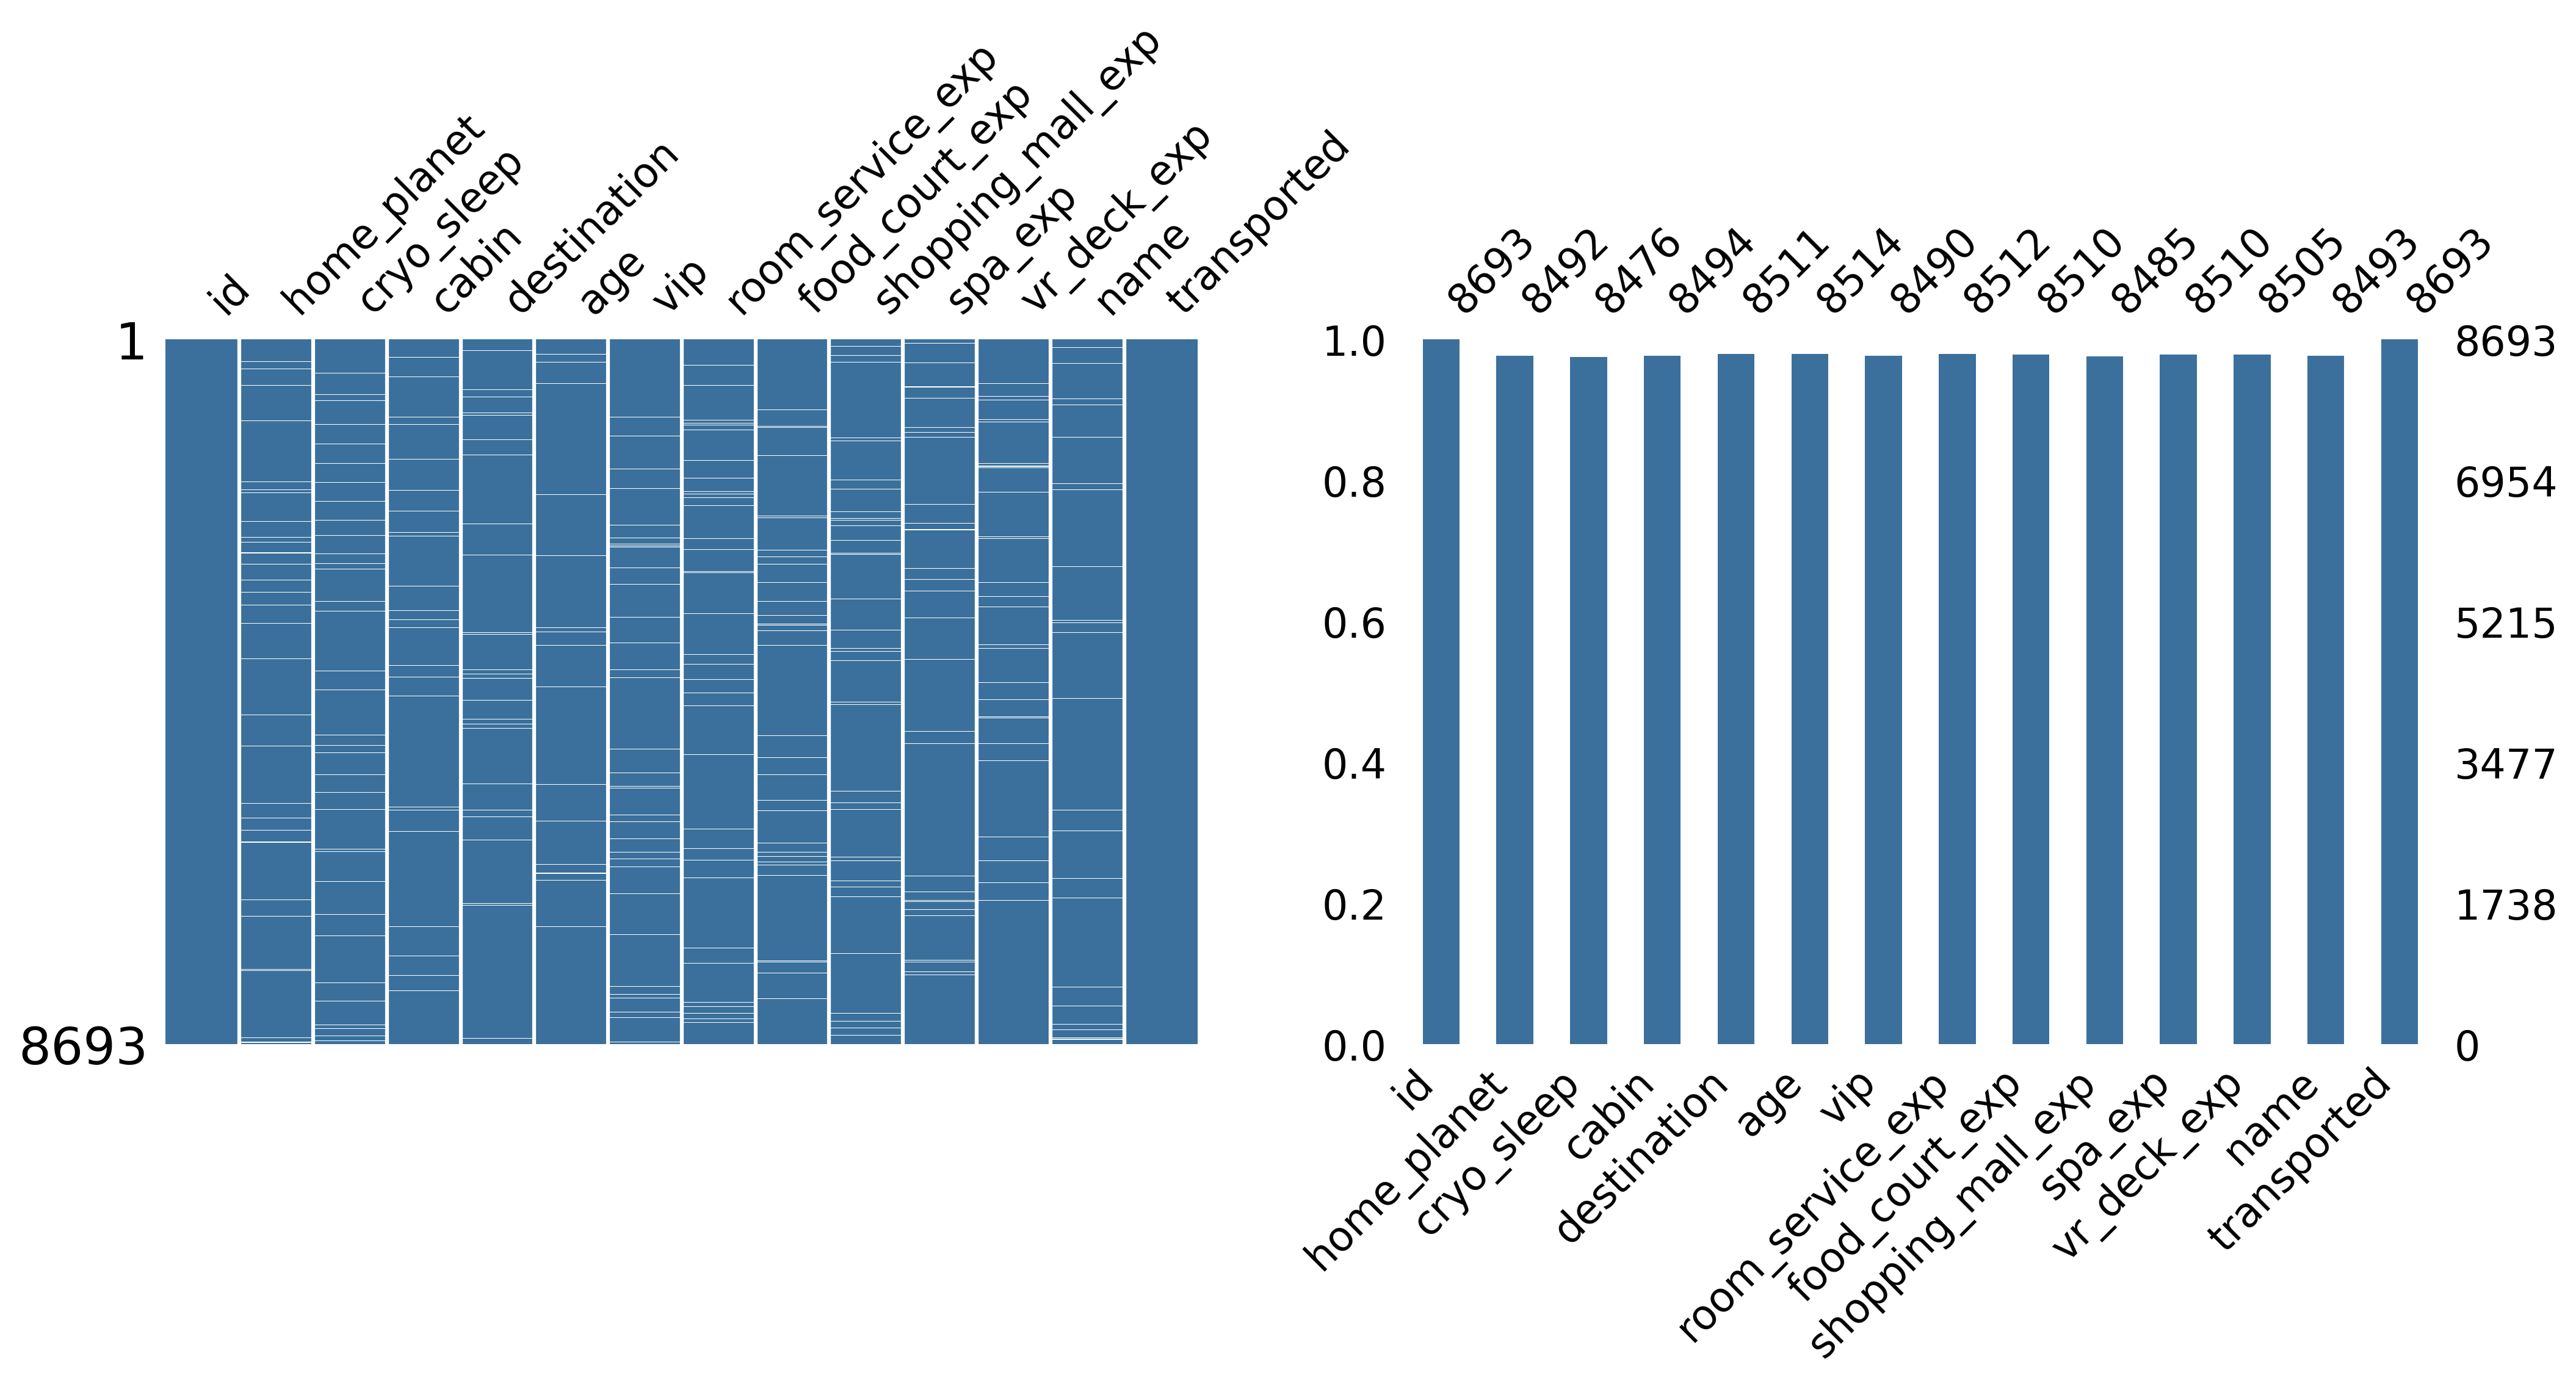

In [4]:
# Visualization Missing Values Distribution across Columns
print(colored(f'MISSING VALUES DISTRIBUTION', color='blue', attrs=['bold','dark']))
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5), dpi=300)
msno.matrix(df, ax=ax1, sparkline=False, color=(.230, .44, .61))
msno.bar(df, ax=ax2, color=(.230, .44, .61))
plt.show()

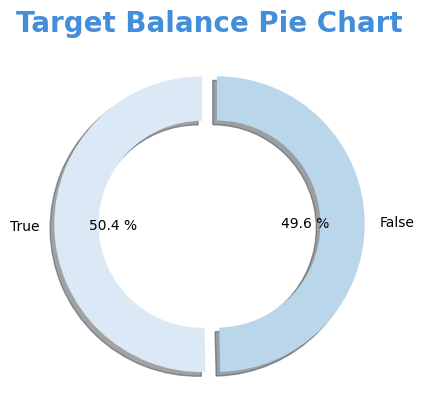

In [5]:
# Target Balance Visualization 
transported, not_transported = df.loc[df['transported']==True].count()[0], df.loc[df['transported']==False].count()[0]
labels = ['True', 'False']
colors = sns.color_palette('Blues')
explode = (.05, .05)

plt.title('Target Balance Pie Chart', loc='center', fontsize=20, color='#438EDB', fontweight='bold')
plt.pie(
    (transported, not_transported),
    labels=labels, colors=colors,
    autopct='%.1f %%', explode=explode, shadow=True,
    startangle=90, wedgeprops={'width':0.3}
)
plt.show()

**Considerations:**
- The Target Feature is very balanced. We might not need to use techniques to fix it.

## Feature Analysis

Number of Categorical features: 7
Number of Numerical features: 6


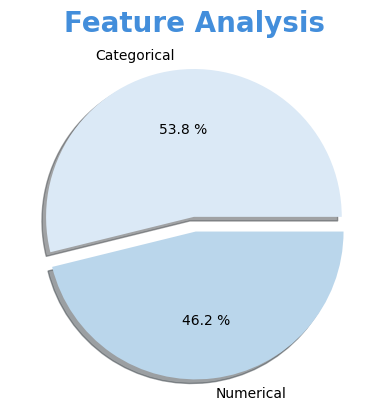

In [6]:
"""
Categorical Data = Discrete unordered set of objects (words, strings, etc).
    Can be splitted in two sub-categories: Nominal Features & Ordinal Features
Ordinal Features = Categorical Values that can be sorted or ordered.
Nominal Features = Categorical Values that don't imply any order.
"""
categorical_feature = ['id', 'home_planet', 'cabin', 'name', 'destination','cryo_sleep','vip']
numerical_feature = ['age','room_service_exp','food_court_exp','shopping_mall_exp', 'spa_exp', 'vr_deck_exp',]

print(colored(f'Number of Categorical features: {len(categorical_feature)}', color='blue', attrs=['bold','dark']))
print(colored(f'Number of Numerical features: {len(numerical_feature)}', color='blue', attrs=['bold','dark']))

labels = ['Categorical', 'Numerical']
values = [len(categorical_feature), len(numerical_feature)]
colors = sns.color_palette('Blues')
explode = (.05, .05)

# Feature Analysis using Pie Chart
plt.title('Feature Analysis', loc='center', fontsize=20, color='#438EDB', fontweight='bold')
plt.pie(values, labels=labels, colors=colors, autopct='%.1f %%', explode=explode, shadow=True)
plt.show()

## Numerical Data

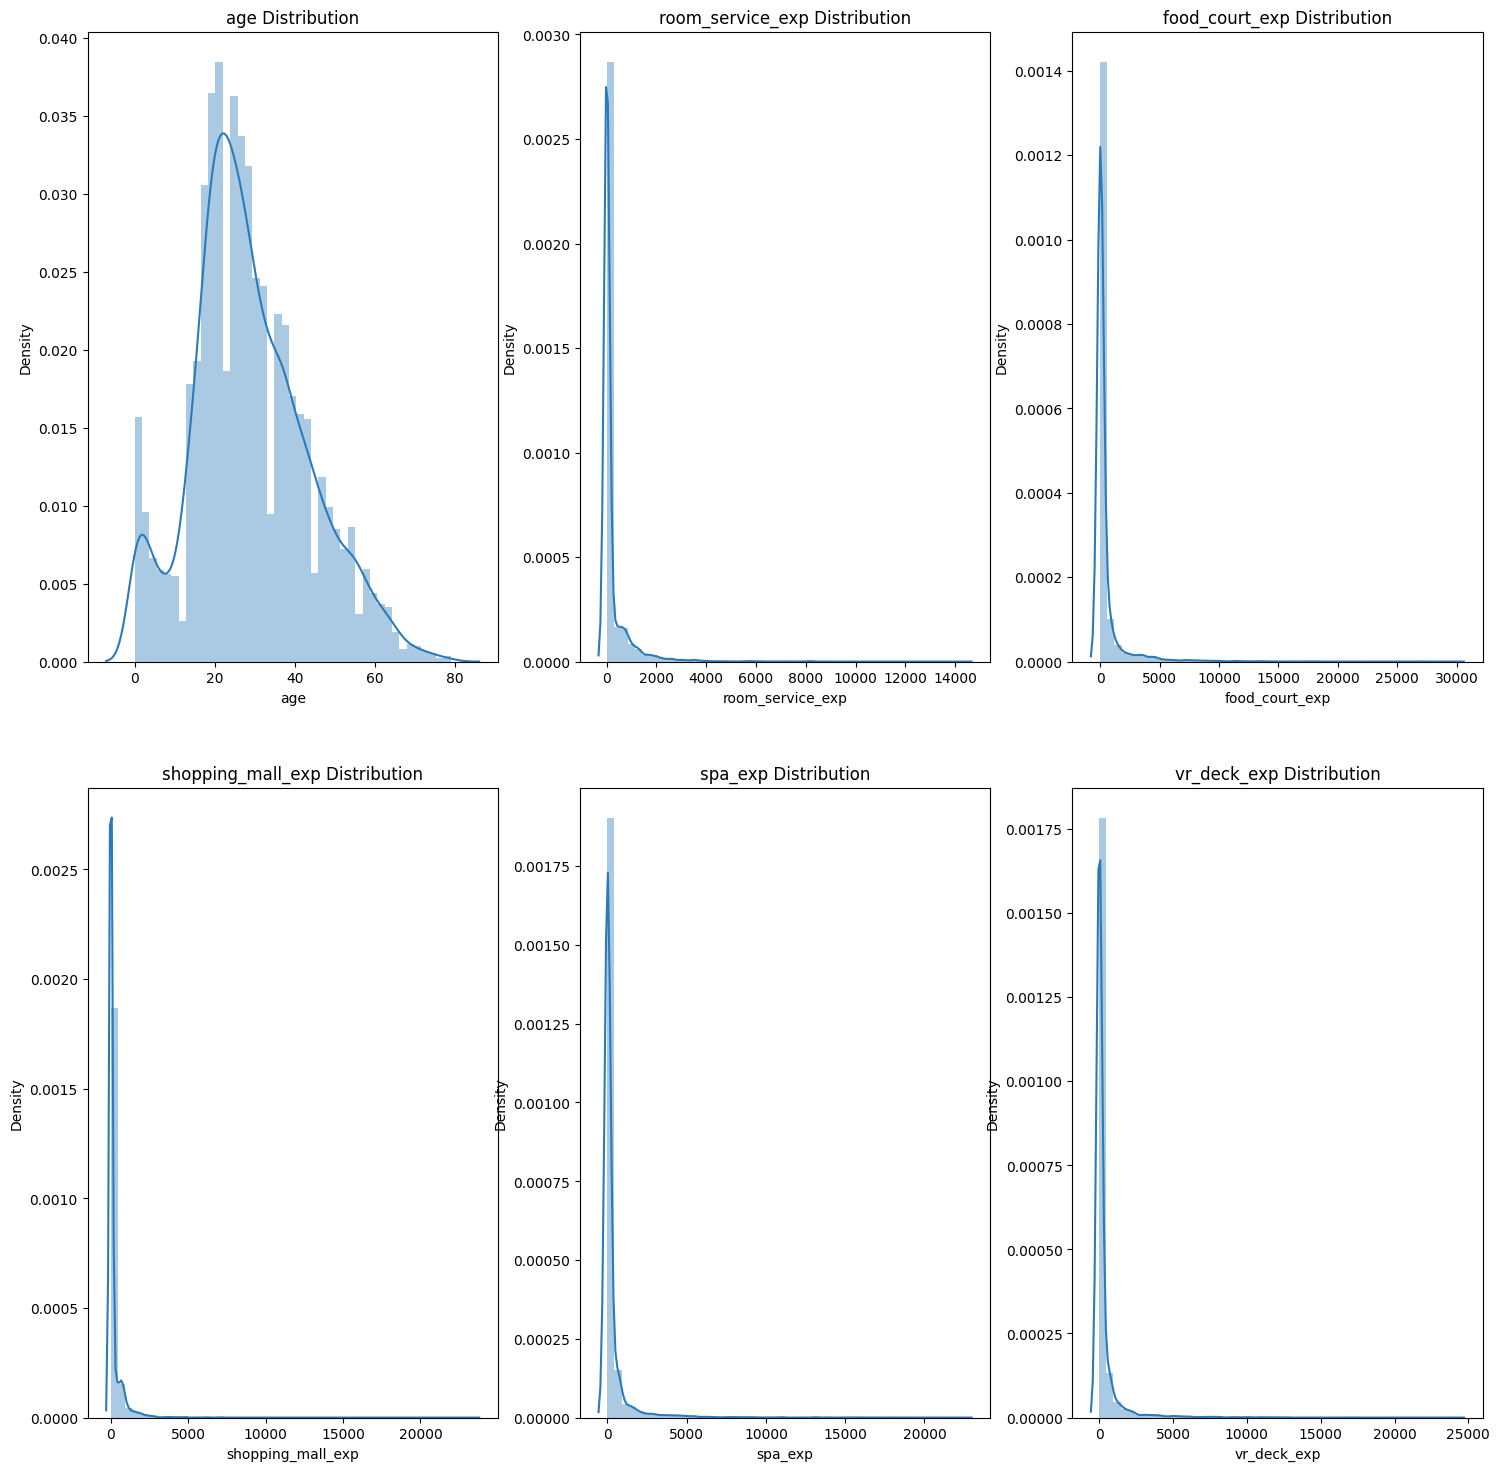

In [7]:
# Numerical Data Distribution Graphs
fig, ax = plt.subplots(2,3, figsize=(18, 18))
for i, feature in enumerate(numerical_feature):
    sns.distplot(df[feature], color=sns.color_palette('Blues')[4], ax=ax[math.floor(i/3),i%3]).set_title(f'{feature} Distribution')
fig.show()

### Age 


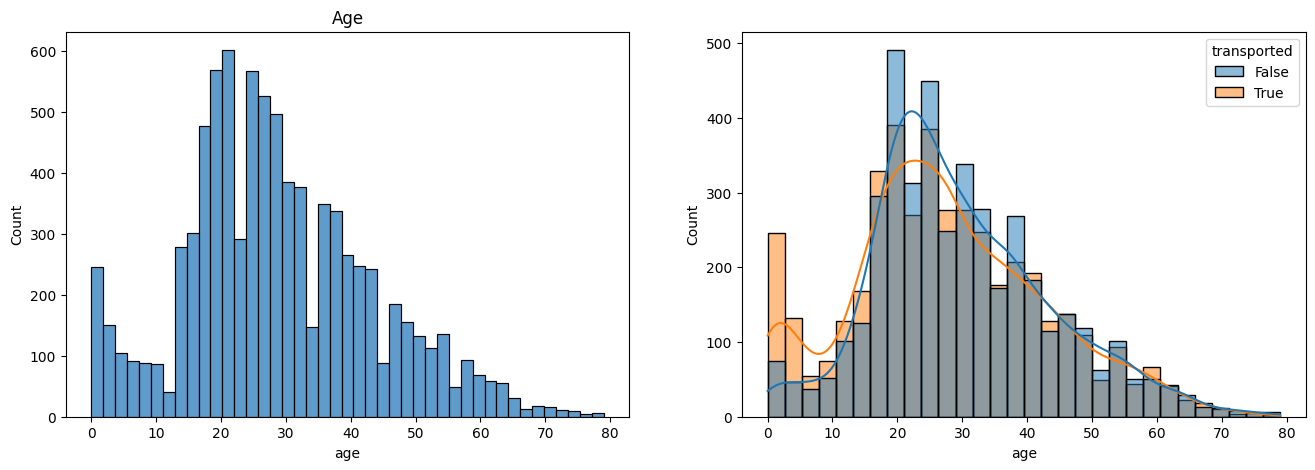

In [8]:
# Age Distribution and Relationship with Target variable
fig=plt.figure(figsize=(16,5))

ax=fig.add_subplot(1,2,1)
sns.histplot(data=df, x='age',axes=ax, color=sns.color_palette('Blues')[4])
ax.set_title('Age')

ax=fig.add_subplot(1,2,2)
sns.histplot(data=df, x='age', axes=ax, bins=30, kde=True, hue='transported')

plt.show()

**Considerations:**
- 0-18 year olds were more likely to be transported than not.
- 18-25 year olds were less likely to be transported than not.
- Over 25 year olds were about equally likely to be transported than not.

### Expenditure

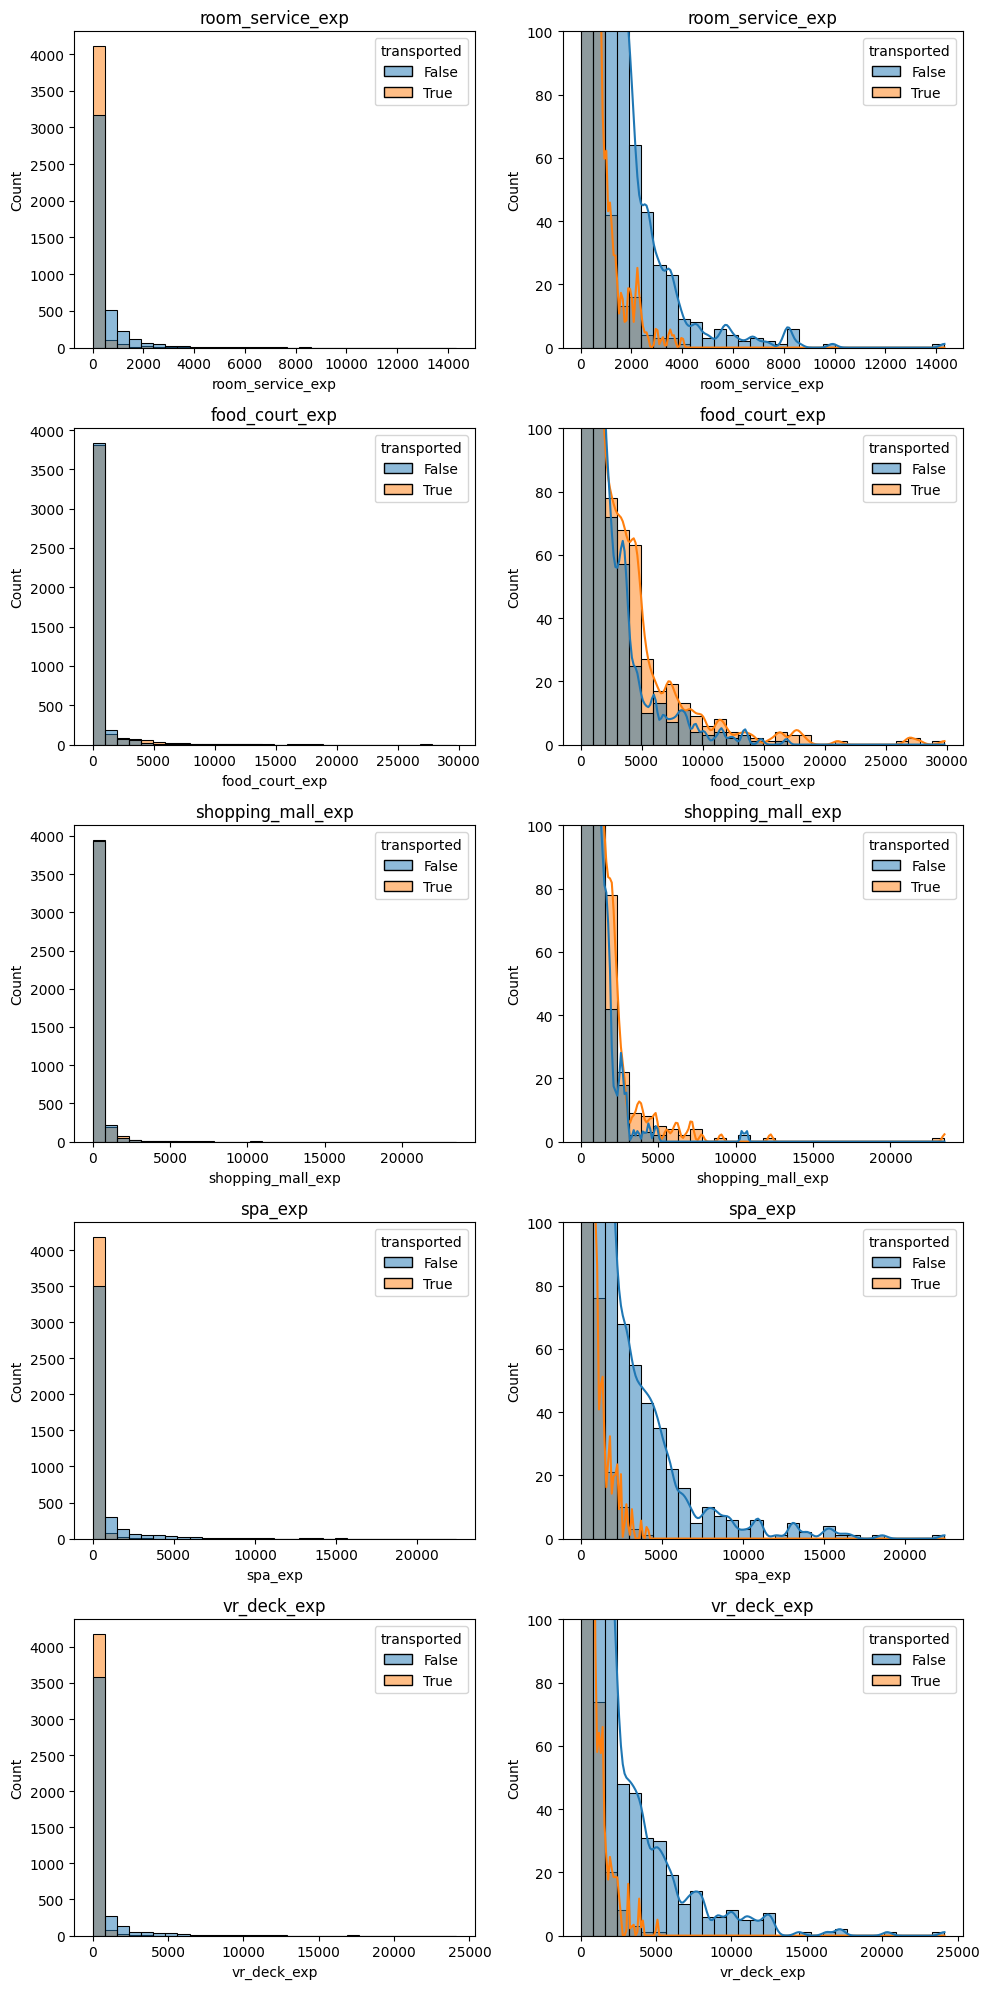

In [9]:
# Expenditure Distribution and Relationship with Target variable
expenses_features=numerical_feature[1:]

# Plot expenditure features
fig=plt.figure(figsize=(10,20))

for i, feature in enumerate(expenses_features):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df, x=feature, axes=ax, bins=30, kde=False, hue='transported')
    ax.set_title(feature)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df, x=feature, axes=ax, bins=30, kde=True, hue='transported')
    plt.ylim([0,100])
    ax.set_title(feature)
    
fig.tight_layout() 
plt.show()

**Considerations:**
- The majority of passengers doesn't spend money.
- Small number of outliers.
- Passengers who spent less were more likely to be transported:
    - For <code>room_service_exp</code>, <code>spa_exp</code> and <code>vr_deck_exp</code>, which can be considered as "Luxurious" expenses, the relation mentioned before holds.
    - For <code>food_court_exp</code> and <code>shopping_mall_exp</code> it's less obvious.

**Insight:**
- Binary feature to check if a person has spent anything or not.

## Categorical Data

### Home Planet

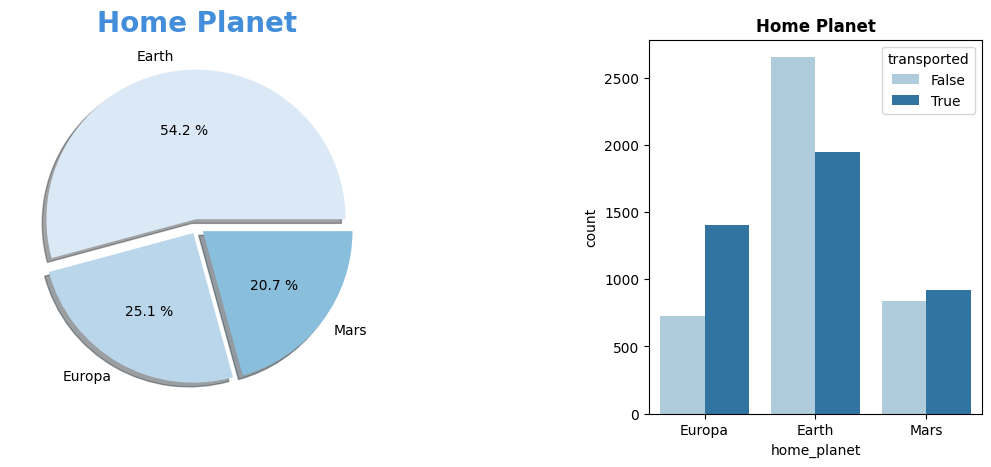

In [10]:
# Home Planet Distribution and Relationship with Target Variable
earth=df.loc[df["home_planet"]=="Earth"].count()[0]
europa=df.loc[df["home_planet"]=="Europa"].count()[0]
mars=df.loc[df["home_planet"]=="Mars"].count()[0]

values = [earth, europa, mars]
labels = ['Earth', 'Europa', 'Mars']
colors = sns.color_palette('Blues')
explode = (.05, .05, .05)

fig=plt.figure(figsize=(16,5))

plt.title('Home Planet', loc='center', fontsize=20, color='#438EDB', fontweight='bold')
plt.pie(values, labels=labels, colors=colors, autopct='%.1f %%', explode=explode, shadow=True)

ax=fig.add_subplot(1,4,4)
sns.countplot(data=df, x='home_planet', axes=ax, palette=sns.color_palette('Paired'), hue='transported')
ax.set_title('Home Planet', fontweight='bold')

fig.tight_layout()  
plt.show()

**Considerations:**
- Majority of passengers come frome planet "Earth".
- People that come from planet "Earth" seems to be less likely to be "Transported" with respect to the other planets.

### Destination

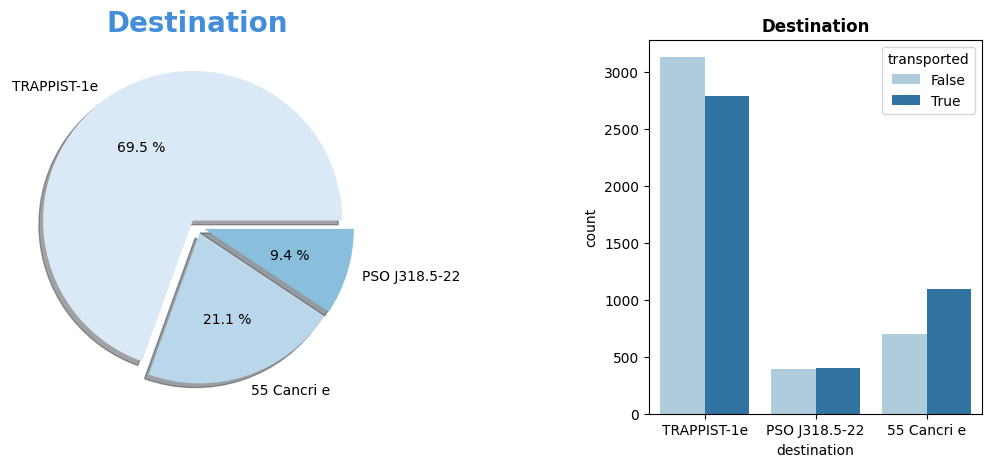

In [11]:
# Destination Planet Distribution and Relationship with Target Variable
trappist=df.loc[df["destination"]=="TRAPPIST-1e"].count()[0]
cancri=df.loc[df["destination"]=="55 Cancri e"].count()[0]
pso=df.loc[df["destination"]=="PSO J318.5-22"].count()[0]

values = [trappist, cancri, pso]
labels = ['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22']
colors = sns.color_palette('Blues')
explode = (.05, .05, .05)

fig=plt.figure(figsize=(16,5))

plt.title('Destination', loc='center', fontsize=20, color='#438EDB', fontweight='bold')
plt.pie(values, labels=labels, colors=colors, autopct='%.1f %%', explode=explode, shadow=True)

ax=fig.add_subplot(1,4,4)
sns.countplot(data=df, x='destination', axes=ax, palette=sns.color_palette('Paired'), hue='transported')
ax.set_title('Destination', fontweight='bold')

fig.tight_layout()  
plt.show()

### Cryo Sleep & VIP

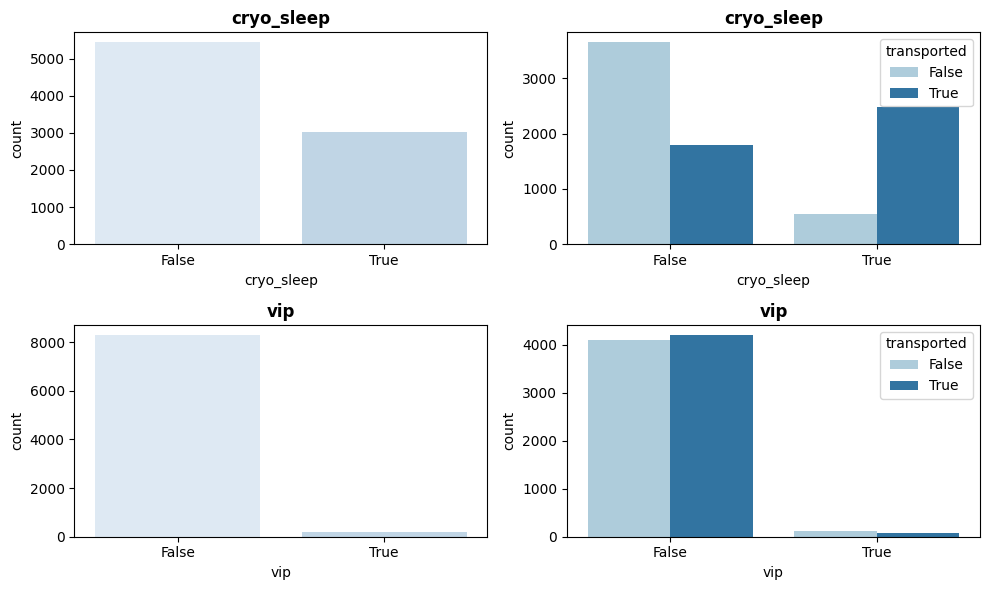

In [12]:
# Plot Boolean Features
fig=plt.figure(figsize=(10,6))
boolean_feature = ['cryo_sleep','vip']
for i, feature in enumerate(boolean_feature):
    ax=fig.add_subplot(2,2,2*i+1)
    sns.countplot(data=df, x=feature, axes=ax, palette=sns.color_palette('Blues'))
    ax.set_title(feature, fontweight='bold')

    ax=fig.add_subplot(2,2,2*i+2)
    sns.countplot(data=df, x=feature, axes=ax, palette=sns.color_palette('Paired'), hue='transported')
    ax.set_title(feature, fontweight='bold')
    
fig.tight_layout()  
plt.show()

**Consideration:**
- VIP does not appear to be a useful feature; the target split is more or less equal.
- CryoSleep appears the be a very useful feature in contrast.


### Cabin Feature

- **<code>id</code>:** A unique ID for each passenger. Each ID takes the form <code>gggg_pp</code> where <code>gggg</code> indicates a group the passenger is traveling with and <code>pp</code> is their number within the group. We can split the id and create a new feature that indicates wheter a passenger is traveling alone.
- **<code>cabin</code>:** The cabin number where the passenger is staying. Takes the form `deck/num/side` , where `side` can be either `P` for **Port** or `S` for **Starboard**.
- **<code>name</code>:** We might consider droping this column, since the majority of its values are unique.

In [13]:
lst_feat = ["id", "cabin", "name"]
display(df[lst_feat].head())

,id,cabin,name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


In [14]:
print(colored(f"\nCabin Deck Values:\n{df['cabin'].apply(lambda x: pd.Series(str(x).split('/')))[0].value_counts().sort_values()}\n", color='blue', attrs=['bold','dark']));
print(colored(f"\nCabin Number Values:\n{df['cabin'].apply(lambda x: pd.Series(str(x).split('/')))[1].value_counts().sort_values()}\n", color='blue', attrs=['bold','dark']));
print(colored(f"\nCabin Side Values:\n{df['cabin'].apply(lambda x: pd.Series(str(x).split('/')))[2].value_counts().sort_values()}\n", color='blue', attrs=['bold','dark']));


Cabin Deck Values:
T         5
nan     199
A       256
D       478
C       747
B       779
E       876
G      2559
F      2794
Name: 0, dtype: int64


Cabin Number Values:
1804     1
962      1
1670     1
1644     1
1694     1
        ..
97      21
176     21
86      22
19      22
82      28
Name: 1, Length: 1817, dtype: int64


Cabin Side Values:
P    4206
S    4288
Name: 2, dtype: int64



**Considerations:**
- My idea is to split our <code>cabin</code> feature, in three different parts:
    - <code>cabin_deck</code>: It is divided in 8 different values.
    - <code>cabin_number</code>: A lot of unique values, might consider dropping it.
    - <code>cabin_side</code>: It is divided in 2 different values
**Insight:**
- Since values from <code>cabin_deck</code> and <code>cabin_side</code> appear to be missing together, I might consider replacing them with a new one, instead of replacing it the usual techniques.

In [15]:
deck_values = df['cabin'].apply(lambda x: pd.Series(str(x).split('/')))[0]
side_values = df['cabin'].apply(lambda x: pd.Series(str(x).split('/')))[2]
cab_df = {'deck':deck_values,'side':side_values, 'transported':df['transported']}
cab_df = pd.DataFrame(data=cab_df)

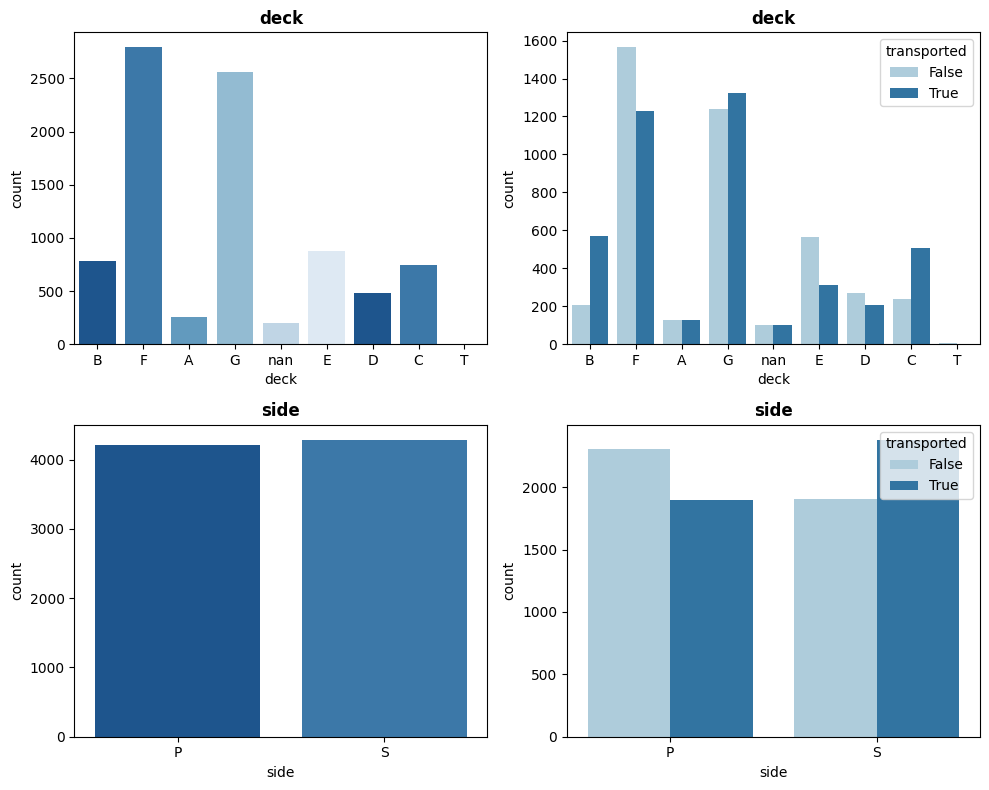

In [16]:
# Cabin Deck and Side Distribution and Relationship with Target Variable
fig=plt.figure(figsize=(10,8))


for i, feature in enumerate(cab_df.drop('transported', axis=1)):
    ax=fig.add_subplot(2,2,2*i+1)
    sns.countplot(data=cab_df, x=feature, palette=sns.color_palette('Blues_r'))
    ax.set_title(feature, fontweight='bold')

    ax=fig.add_subplot(2,2,2*i+2)
    sns.countplot(data=cab_df, x=feature, palette=sns.color_palette('Paired'), hue='transported')
    ax.set_title(feature, fontweight='bold')
    

fig.tight_layout()


**Observation:**
- Passangers located in the "Starboard" side seems to be more likely to be "Transported"

### Id Feature

**Insight:**
- I might consider to drop the first part of the "Passenger ID", and use the feature that indicates the number of people in the group, to create a new feature that indicates whether the passengeris travelling alone or not.

In [17]:
id_values = df['id'].apply(lambda x: pd.Series(str(x).split('_')))[1].values
cab_df = {'group_members':id_values, 'transported':df['transported']}
cab_df = pd.DataFrame(data=cab_df)

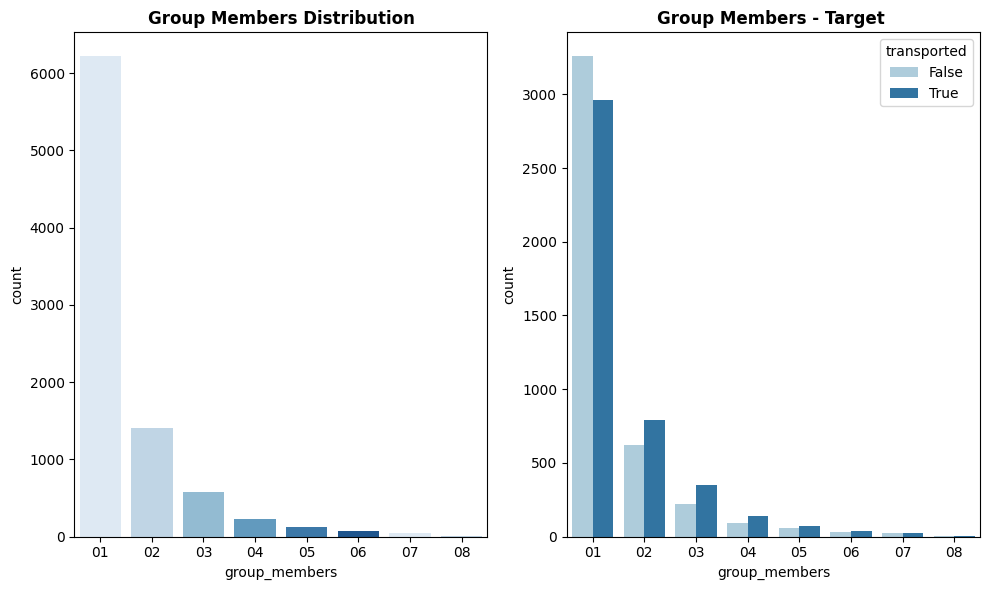

In [18]:
# Group Members Distribution and Relationship with Target Variable
fig=plt.figure(figsize=(10,6))

ax=fig.add_subplot(1,2,1)
sns.countplot(data=cab_df, x='group_members', palette=sns.color_palette('Blues'))
ax.set_title('Group Members Distribution', fontweight='bold')


ax=fig.add_subplot(1,2,2)
sns.countplot(data=cab_df, x='group_members', palette=sns.color_palette('Paired'), hue='transported')
ax.set_title('Group Members - Target ', fontweight='bold') 

fig.tight_layout()  
plt.show()

**Observation:**
- Passengers travelling alone were more likely to be "transported".

# Data Pre-Processing

## Custom Transformer

### From ID to Is Alone

In [19]:
def get_n_members(X):
    return X.squeeze().str.split("_", expand=True)[1].values.reshape(-1,1).astype(int)

memb_num = FunctionTransformer(get_n_members)

In [20]:
class AloneTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = get_n_members(X)
        idx = X.sum(axis=1) > 1
        X = np.ones(X.shape[0])
        X[idx] = 0
        return X.reshape(-1,1)
        
    def get_feature_names_out(self, input_features=None):
        return ['is_alone']

### From Cabin to Deck and Side

In [21]:
def cabin_deck_side(X):
    return X.squeeze().str.split("/", expand=True)[0], X.squeeze().str.split("/", expand=True)[2]

cab_split = FunctionTransformer(cabin_deck_side)

In [22]:
class CabinSplit(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return pd.DataFrame(cabin_deck_side(X)).T
        
    def get_feature_names_out(self, input_features=None):
        return ['cabin_deck','cabin_side']

### From Expenditure to No Expenses

In [23]:
class TotExpenses(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return pd.DataFrame(X.sum(axis=1))

    def get_feature_names_out(self, input_features=None):
        return ['tot_expenses']

Which I decided not to use anymore cause it was creating some problems to the classifiers.

In [24]:
class NoExpenses(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        idx = X.sum(axis=1) != 0
        X = np.ones(X.shape[0])
        X[idx] = 0
        return X.reshape(-1,1) 
        
    def get_feature_names_out(self, input_features=None):
        return ['no_expeneses']

## Pipelines & Final Column Transformer

In [25]:
pipeline_home_planet_destination = Pipeline(
    [
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(categories='auto',drop='first',handle_unknown='ignore'))
    ]
)

pipeline_cryo_vip = Pipeline(
    [
        ('ord', OrdinalEncoder(categories='auto')),
        ('imp', KNNImputer(n_neighbors=5))
    ]
)

pipeline_cabin_side_deck = Pipeline(
    [
        ('split', CabinSplit()),
        ('imp', SimpleImputer(strategy='constant', fill_value='Z')),
        ('ohe', OneHotEncoder(categories='auto',drop='first',handle_unknown='ignore'))
    ]
)

pipeline_age_expenses = Pipeline(
    [
        ('imp', KNNImputer(n_neighbors=5)),
        ('scaler', StandardScaler())
    ]
)

final_transformation = ColumnTransformer(
    transformers=[
        ('is_alone', AloneTransformer(), ['id']),
        ('home_destination', pipeline_home_planet_destination, ['home_planet',  'destination']),
        ('cryo_sleep', pipeline_cryo_vip, ['cryo_sleep', 'vip']),
        ('age_expenses', pipeline_age_expenses, ['age', 'room_service_exp', 'food_court_exp', 'shopping_mall_exp', 'spa_exp', 'vr_deck_exp']),
        ('no_expenses', NoExpenses(), ['room_service_exp', 'food_court_exp', 'shopping_mall_exp', 'spa_exp', 'vr_deck_exp']),
        ('cab_deck_side', pipeline_cabin_side_deck, ['cabin']),
    ],
remainder='drop',
verbose_feature_names_out=False,
sparse_threshold=0
)

## OFC: HeatMap After Transformations

In [26]:
temp = pd.DataFrame(final_transformation.fit_transform(df), columns=final_transformation.get_feature_names_out())
temp['transported'] = df['transported']

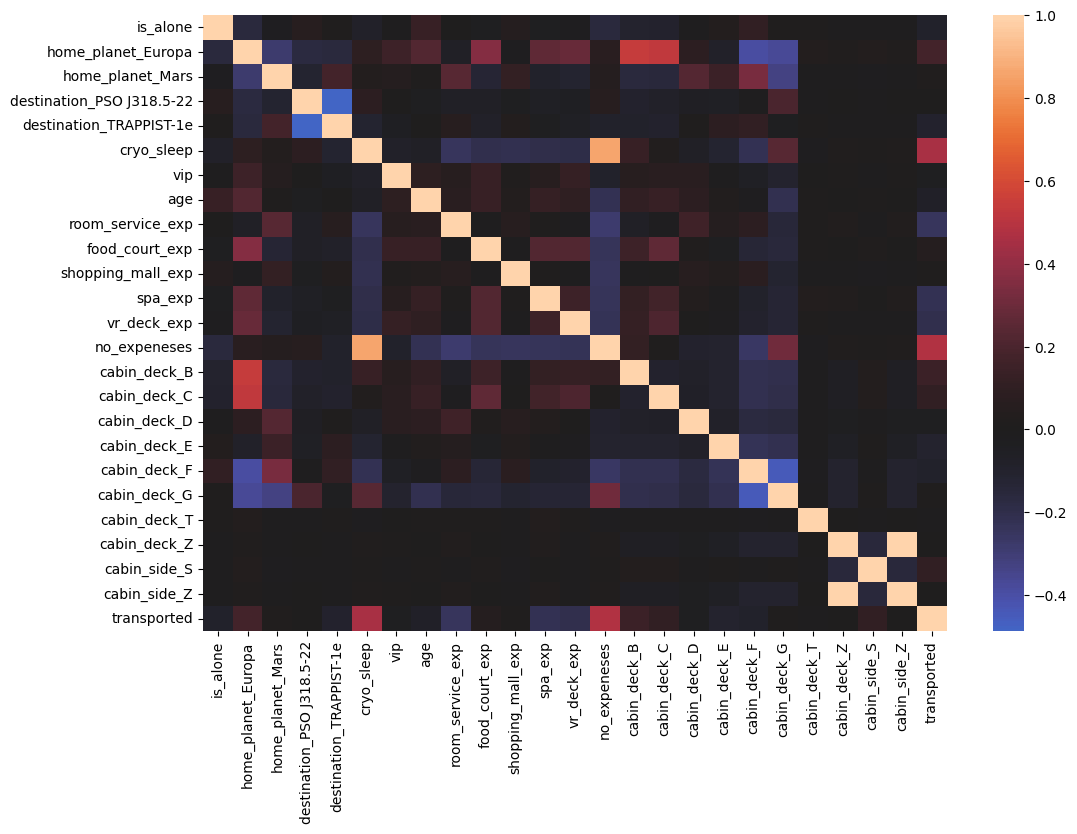

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(temp.corr(),center=0, annot=False);

# Training and Test set

In [28]:
X, y = df.drop('transported', axis=1), df['transported'].map({True:1, False:0})

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=30, shuffle=True)

# Model Selection


Model selection

To briefly mention the algorithms we will use,

- **Logistic Regression:** Logistic Regression is a statistical method for binary classification problems, where the goal is to predict a binary outcome based on input features. The logistic function is used to model the relationship between the inputs and the binary outcome by mapping real-valued inputs to a probability between 0 and 1. The model is optimized by minimizing a cost function using gradient descent. Once trained, the model can be used to make predictions by computing the predicted probability and thresholding it to make a binary decision. Logistic Regression is simple, fast and provides a probabilistic interpretation of the output, but has limitations and may be improved by using more complex models.

- **K-Nearest Neighbors (KNN):** K-Nearest Neighbors (KNN) is a non-parametric method for classification and regression problems. It works by finding the K nearest data points to a new sample in the feature space and classifying the new sample based on the majority class of its K nearest neighbors. KNN has a simple implementation, as it requires no training phase and stores the entire dataset to make predictions. The choice of K is important, as a small K will lead to overfitting, while a large K will lead to underfitting. KNN can handle multi-class problems, non-linear decision boundaries, and can be used for regression by using the mean or median of the K nearest neighbors as the prediction.

- **Random Forest (RF):** Random Forest is an ensemble machine learning algorithm used for both classification and regression problems. It works by combining multiple decision trees, where each tree is trained on a random subset of the data and a random subset of the features. During prediction, the Random Forest takes a majority vote or takes the average of the outputs from individual trees to make a final prediction. This technique helps reduce overfitting by averaging out the errors made by individual trees and improving the overall model performance.

- **Support Vector Classifier (SVC):** Support Vector Classifier (SVC) is a supervised machine learning algorithm used for classification problems. It is based on the concept of Support Vector Machines (SVMs). SVC tries to find the optimal boundary (known as hyperplane) that separates the data points into different classes in a multi-dimensional space. The boundary that maximizes the margin, i.e. the distance between the boundary and the closest data points, is considered as the optimal boundary. These closest data points to the boundary are known as support vectors.

In [30]:
model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('dim_reduction', PCA(n_components=0.8)),
    ('classifier', Perceptron())
])

In [31]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('is_alone',
                                                  AloneTransformer(), ['id']),
                                                 ('home_destination',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['home_planet',
                                                   'destination']),
                                                 ('cryo_sleep',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder()),
                                                                  ('i...
                                                   'food_court_exp',
                                                   'shopping_mall_exp',
                                                   'spa_exp', 'vr_deck_exp']),
                                                 ('cab_deck_side',
                                                  Pipeline(steps=[('split',
                                                                   CabinSplit()),
                                                                  ('imp',
                                                                   SimpleImputer(fill_value='Z',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['cabin'])],
                                   verbose_feature_names_out=False)),
                ('dim_reduction', PCA(n_components=0.8)),
                ('classifier', Perceptron())])

In [32]:
model_pipeline.predict(X_test)

array([0, 1, 1, ..., 1, 1, 0])

## Model Configurations

In [33]:
"""
I'm not using sampling techniques cause they are not necessary givan my Dataset.

sampler_configs = [
    {
        'sampler':[None],# The element is bypassed
    },
    {
        'sampler':[SMOTE(n_jobs=-1)],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    },
    {
        'sampler':[RandomOverSampler()],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    }
]
"""

dim_reduction_configs = [
    {
        'dim_reduction': [None]
    },
    {
        'dim_reduction': [PCA()],
        'dim_reduction__n_components': [0.5, 0.7, 0.9]
    },
    {
        'dim_reduction': [LDA()]
    },
    {
        'dim_reduction': [SFS(estimator=Perceptron(), cv = None, scoring = 'f1')],
        'dim_reduction__estimator': [Perceptron(), LogisticRegression()],
        'dim_reduction__k_features' : [5,7,10]  
    }
]

classifier_configs = [

    {
        'classifier': [LogisticRegression(solver='saga')],
        'classifier__C' : loguniform(0.001,100),
        'classifier__penalty': ['l1','l2'],
        'classifier__class_weight' : [None, 'balanced'],
        

    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3,5,7,9]
        
    },
    {
        'classifier' : [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 150, 200, 250, 300],
        'classifier__max_depth': [4, 6, 8, 10, 12]
    },
    {
        'classifier': [SVC()],
        'classifier__C': loguniform(0.001, 100),
        'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'classifier__class_weight': [None, 'balanced']
    }
]

In [34]:
all_configs = []
for configuration in itertools.product(dim_reduction_configs, classifier_configs):
    all_configs.append((dict(itertools.chain(*(e.items() for e in configuration)))))
f'Number of all possible configurations: {len(all_configs)}'

'Number of all possible configurations: 16'

In [35]:
all_configs[:2]

[{'dim_reduction': [None],
  'classifier': [LogisticRegression(solver='saga')],
  'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f1681f72af0>,
  'classifier__penalty': ['l1', 'l2'],
  'classifier__class_weight': [None, 'balanced']},
 {'dim_reduction': [None],
  'classifier': [KNeighborsClassifier()],
  'classifier__n_neighbors': [3, 5, 7, 9]}]

## Model Selection

In [36]:
rs = RandomizedSearchCV(model_pipeline,
    param_distributions=all_configs,
    n_iter=len(all_configs) * 5,
    n_jobs=-1,
    cv = 2,
    scoring='f1'
)

In [37]:
scores = cross_validate(rs, X_train, y_train, scoring='f1', cv = 5, return_estimator=True, verbose=3) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not 

In [38]:
print(colored('Best 5 Estimators (F1-score)',color='blue', attrs=['bold','dark']))
print(colored('#'*100, color='blue', attrs=['bold','dark']))
for index, estimator in enumerate(scores['estimator']):
    #print(estimator.best_estimator_.get_params()['sampler'])
    print(estimator.best_estimator_.get_params()['dim_reduction'])
    print(estimator.best_estimator_.get_params()['classifier'],estimator.best_estimator_.get_params()['classifier'].get_params())
    print(scores['test_score'][index])
    print(colored('- '*100, color='blue', attrs=['bold','dark']))


Best 5 Estimators (F1-score)
####################################################################################################
PCA(n_components=0.7)
LogisticRegression(C=0.06320578224120157, solver='saga') {'C': 0.06320578224120157, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
0.8096795291039894
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
SequentialFeatureSelector(cv=None, estimator=LogisticRegression(),
                          k_features=(5, 5), scoring='f1')
LogisticRegression(C=0.3958888144036782, solver='saga') {'C': 0.3958888144036782, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_

In [39]:
print(colored('Best 5 Estimators Performance (F1-score)',color='blue', attrs=['bold','dark']))
print(colored('#'*100, color='blue', attrs=['bold','dark']))
for estimator in scores['estimator']:
    pred_train = estimator.best_estimator_.fit(X_train, y_train)
    pred_train = estimator.best_estimator_.predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')

Best 5 Estimators Performance (F1-score)
####################################################################################################
F1 on training set:0.8073706220595922, F1 on test set:0.8054535920293655
F1 on training set:0.8075923036921476, F1 on test set:0.7991653625456442
F1 on training set:0.8092002090956611, F1 on test set:0.8048268625393493
F1 on training set:0.8063846353490784, F1 on test set:0.8058455114822547
F1 on training set:0.8090445693373415, F1 on test set:0.805249343832021


## Hyperparameter Tuning

<div class="alert alert-block alert-info">After different tries, I decided, based on previous evaluations and experience, to use this setup for my final model pipeline.

- <code>final_transformation</code>: Created a priori
- <code>PCA()</code>: PCA is a dimensionality reduction technique that uses linear combinations of features to project data onto a lower-dimensional subspace such that the projected data has maximum variance. The first principal component accounts for the most variance, and each subsequent component captures less variance while orthogonal to all previous components. PCA is useful for data visualization, removing noise and finding patterns in high-dimensional data. I kept the value of <code>n_component=9</code> because it helped me get the best results, especially for the ROC curve. In this way we select the number of components such that the ammount of variance that needs to be explained is bigger than 90%.
- <code>LogisticRegression</code>: That unexpectedly outperformed SVC and RandomForest Classifiers.</div>

In [40]:
best_model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('dim_reduction', PCA(n_components=0.9)),
    ('classifier',LogisticRegression(penalty='l1', class_weight='balanced', solver='saga'))
])


In [41]:
params = {
    'classifier__C': uniform(loc = 0.01, scale = 20),
    'classifier__penalty':[None, 'l1', 'l2']
}

In [42]:
rs_best = RandomizedSearchCV(
    estimator = best_model_pipeline,
    param_distributions = params,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3),
    n_iter=20,
    scoring='f1'
)

In [43]:
rs_best.fit(X_train, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('trans',
                                              ColumnTransformer(sparse_threshold=0,
                                                                transformers=[('is_alone',
                                                                               AloneTransformer(),
                                                                               ['id']),
                                                                              ('home_destination',
                                                                               Pipeline(steps=[('imp',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ign...
                                                                               ['cabin'])],
                                                                verbose_feature_names_out=False)),
                                             ('dim_reduction',
                                              PCA(n_components=0.9)),
                                             ('classifier',
                                              LogisticRegression(class_weight='balanced',
                                                                 penalty='l1',
                                                                 solver='saga'))]),
                   n_iter=20,
                   param_distributions={'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f1681b3e0a0>,
                                        'classifier__penalty': [None, 'l1',
                                                                'l2']},
                   scoring='f1')

In [44]:
rs_best.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('is_alone',
                                                  AloneTransformer(), ['id']),
                                                 ('home_destination',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['home_planet',
                                                   'destination']),
                                                 ('cryo_sleep',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder()),
                                                                  ('i...
                                                 ('cab_deck_side',
                                                  Pipeline(steps=[('split',
                                                                   CabinSplit()),
                                                                  ('imp',
                                                                   SimpleImputer(fill_value='Z',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['cabin'])],
                                   verbose_feature_names_out=False)),
                ('dim_reduction', PCA(n_components=0.9)),
                ('classifier',
                 LogisticRegression(C=6.348545672393416,
                                    class_weight='balanced', solver='saga'))])

# Model Evaluation

## Confusion Matrix

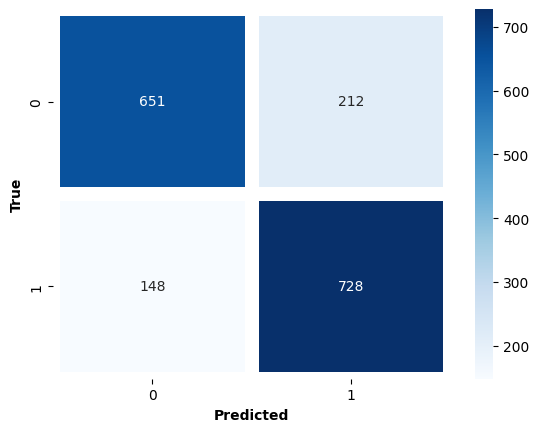

In [45]:
y_pred = rs_best.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, linewidths=10, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('True', fontweight='bold')


fig.tight_layout() 
plt.show()

## ROC Curve
The ROC Graph summarizes all of the confusion matrices that each threshold produced.

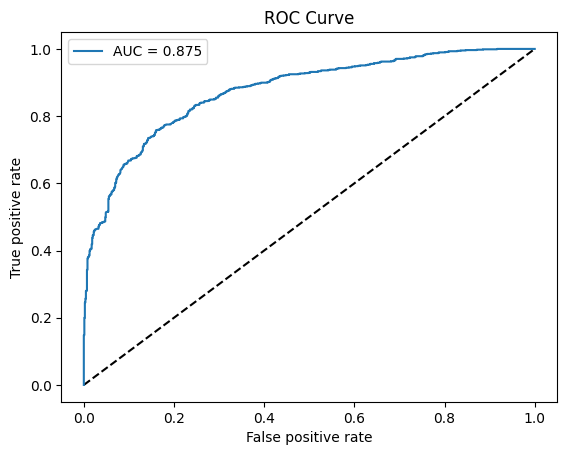

In [46]:
# Probabilities on the test set
y_pred_prod = rs_best.best_estimator_.predict_proba(X_test)[:,1]
# Calculate l'AUC
auc = roc_auc_score(y_test, y_pred_prod)
# Calculate coordinates of ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prod)
# ROC Curve Visualization
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))

# True Positive Rate = TP / (TP + FN); Recall
plt.xlabel('False positive rate')

# False Positive Rate = FP / FP + TN; 1 - Recall
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')



fig.tight_layout()
plt.show()

## Classification  Report

In [47]:
performances = {
    'accuracy' : accuracy_score,
    'precision' : precision_score,
    'recall' : recall_score,
    'f1' : f1_score,
    'AuC' : roc_auc_score
}

data_sets = {
    'train' : (X_train, y_train),
    'test' : (X_test, y_test)
}

evaluation = {k:[]for k in performances.keys()}
evaluation['data_set'] = []

In [48]:
cls = rs_best.best_estimator_
cls.fit(*data_sets['train'])

for d_name, d_set in data_sets.items():
    evaluation['data_set'].append(d_name)
    y_pred = cls.predict(d_set[0])
    y_pred_prob = cls.predict_proba(d_set[0])[:,1]
    for perf_name, perf in performances.items():
        if perf_name == 'AuC':
            evaluation[perf_name].append(perf(d_set[1], y_pred_prob))
        else:
            evaluation[perf_name].append(perf(d_set[1], y_pred))
        
df_evaluation = pd.DataFrame(evaluation)
df_evaluation

,accuracy,precision,recall,f1,AuC,data_set
0,0.794075,0.779126,0.824957,0.801387,0.877080,train
1,0.792984,0.774468,0.831050,0.801762,0.874604,test


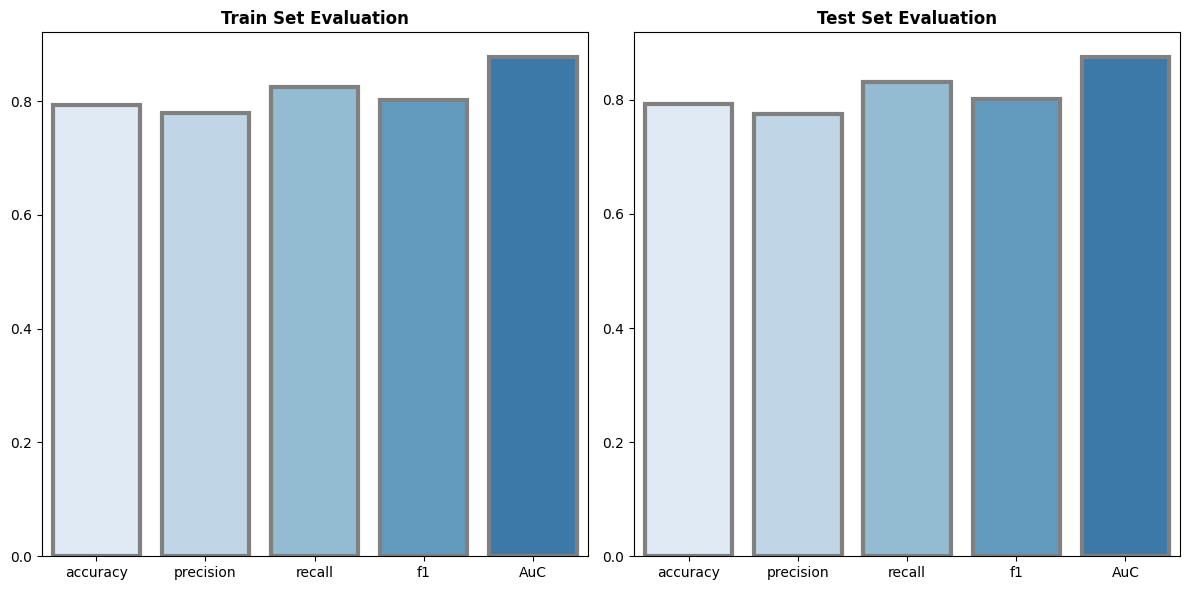

In [49]:
fig=plt.figure(figsize=(12,6))

ax=fig.add_subplot(1,2,1)
sns.barplot(data=df_evaluation[:1], palette=sns.color_palette('Blues'), capsize=.4, linewidth=3, edgecolor=".5")
ax.set_title('Train Set Evaluation', fontweight='bold')

ax=fig.add_subplot(1,2,2)
sns.barplot(data=df_evaluation[1:2], palette=sns.color_palette('Blues'), capsize=.4, linewidth=3, edgecolor=".5")
ax.set_title('Test Set Evaluation', fontweight='bold')

fig.tight_layout()
plt.show()

## Plot Learning Curve

In [50]:
train_sizes, train_scores, test_scores = learning_curve(cls,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_scorer.py"

(0.6, 1.03)

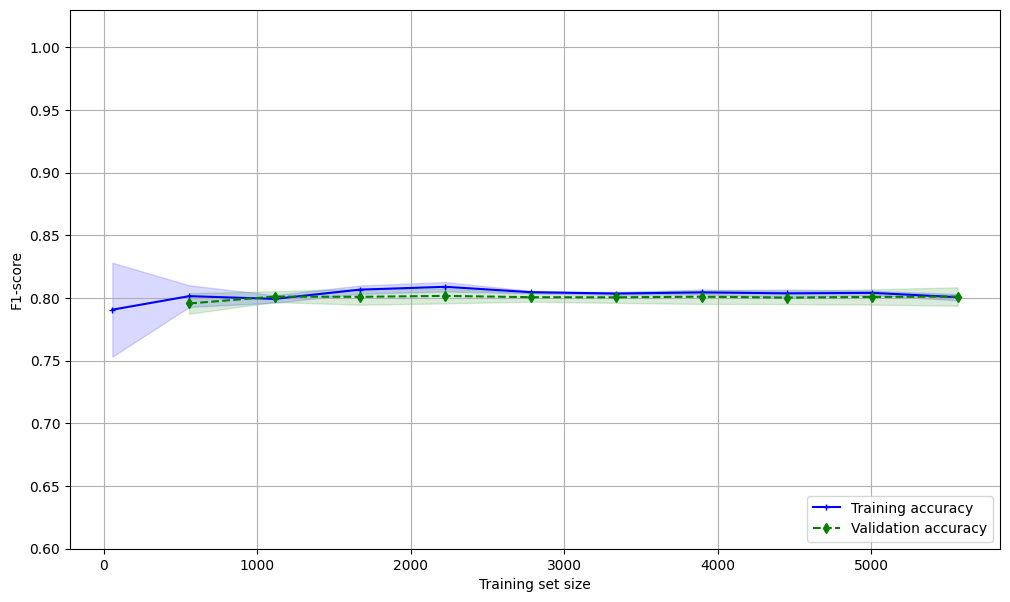

In [51]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.60, 1.03])

Observe the pattern in the plots:

    If the training performance improves as model complexity increases, but the validation performance decreases, then the model is overfitting (high variance).
    If both the training and validation performance are poor, then the model is underfitting (high bias).
    If both the training and validation performance are good, then the model is a good balance of bias and variance.

## Plot Validation Curve

In [52]:
range_C = [0.001,0.01,0.1,1,10,100]
train_scores, test_scores = validation_curve(cls,
        X=X_train, 
        y=y_train, 
        param_range=
        range_C, 
        param_name='classifier__C',
        cv=5, 
        n_jobs=-1, 
        scoring='f1'
)

(0.0, 100.0)

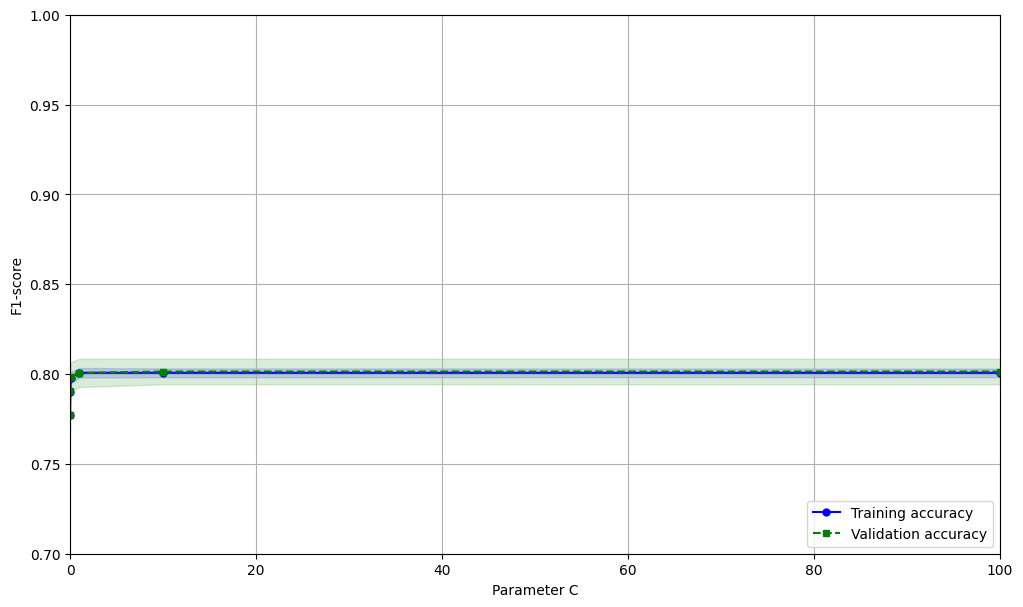

In [53]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(range_C, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(range_C,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(range_C, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(range_C,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()

ax.set_xlabel('Parameter C')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.7, 1])

ax.set_xlim([0.00,100])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=579d7ef2-19c7-4c2a-9b51-4db459358d8e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>